In [3]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
import tensorflow as tf  # TensorFlow for machine learning tasks
from tensorflow import keras  # Keras, a high-level neural networks API, integrated with TensorFlow
from keras.utils import to_categorical  # Utility function for one-hot encoding
from ucimlrepo import fetch_ucirepo  # Custom module for fetching datasets from UCI repository
from sklearn.impute import SimpleImputer  # Imputer for handling missing data
from sklearn.feature_selection import SelectKBest, f_classif  # Feature selection methods
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Train-test split for model evaluation
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling (duplicate import)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics
from sklearn.preprocessing import OneHotEncoder  # OneHotEncoder for categorical feature encoding
from sklearn.metrics import accuracy_score  # Import accuracy_score from scikit-learn metrics
from scipy.stats import mode  # Import mode function from SciPy for majority voting
# Setting the number of classes for the classification task
import seaborn as sns
import matplotlib.pyplot as plt
num_classes = 2  # In this case, there are two classes

In [2]:
!pip install pandas numpy tensorflow scikit-learn scipy seaborn matplotlib
!pip install tensorflow
!pip install ucimlrepo

In [5]:
dataset=pd.read_csv("./heart.csv")

In [ ]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visulizations

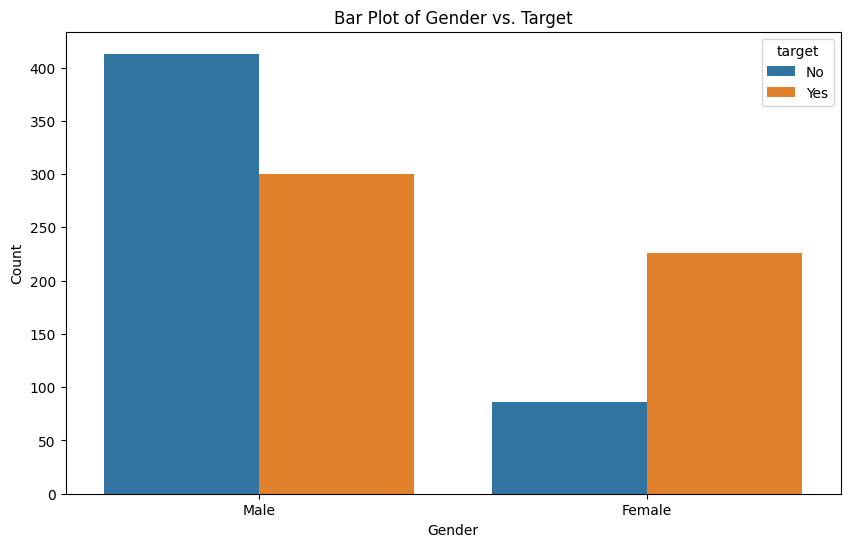

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the DataFrame for plotting
plot_data = dataset.copy()

# Replace values for target and education in the copy
plot_data['target'] = plot_data['target'].replace({0: 'No', 1: 'Yes'})
plot_data['sex'] = plot_data['sex'].replace({1: 'Male', 0: 'Female'})

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=plot_data)
plt.title('Bar Plot of Gender vs. Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


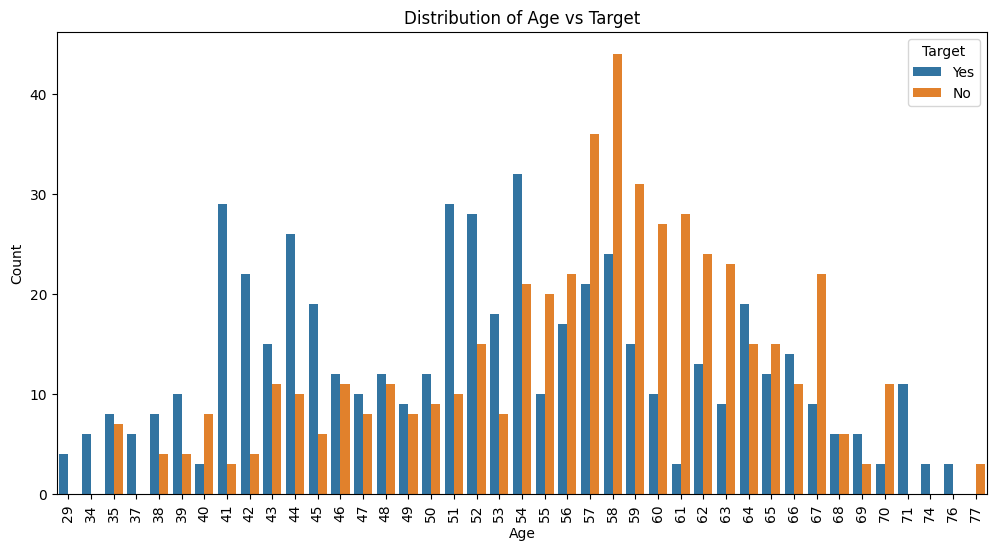

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Replace values for TenYearCHD and education in the copy
plot_data['age'] = plot_data['age']

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='target', data=plot_data)
plt.title('Distribution of Age vs Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target')
plt.show()

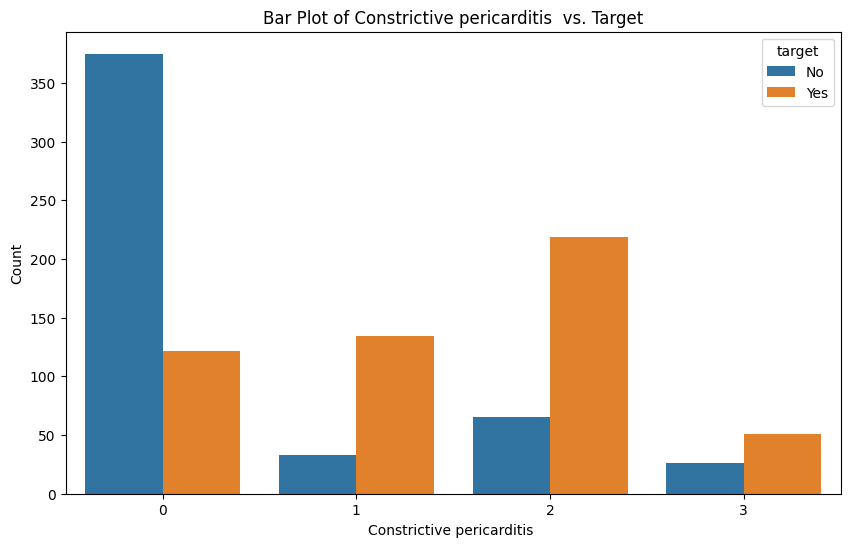

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the DataFrame for plotting



# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=plot_data)
plt.title('Bar Plot of Constrictive pericarditis  vs. Target')
plt.xlabel('Constrictive pericarditis ')
plt.ylabel('Count')
plt.show()


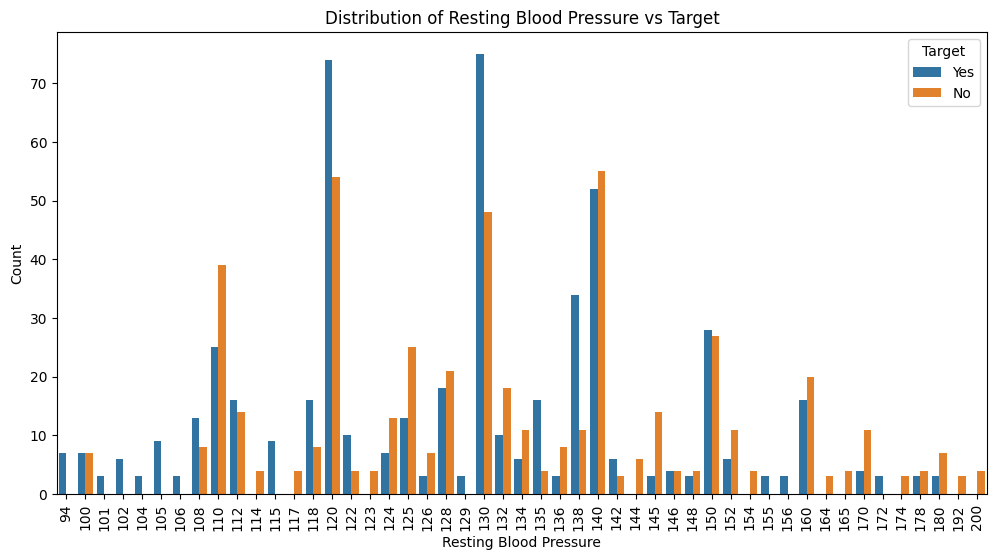

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Replace values for TenYearCHD and education in the copy

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='trestbps', hue='target', data=plot_data)
plt.title('Distribution of Resting Blood Pressure vs Target')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target')
plt.show()

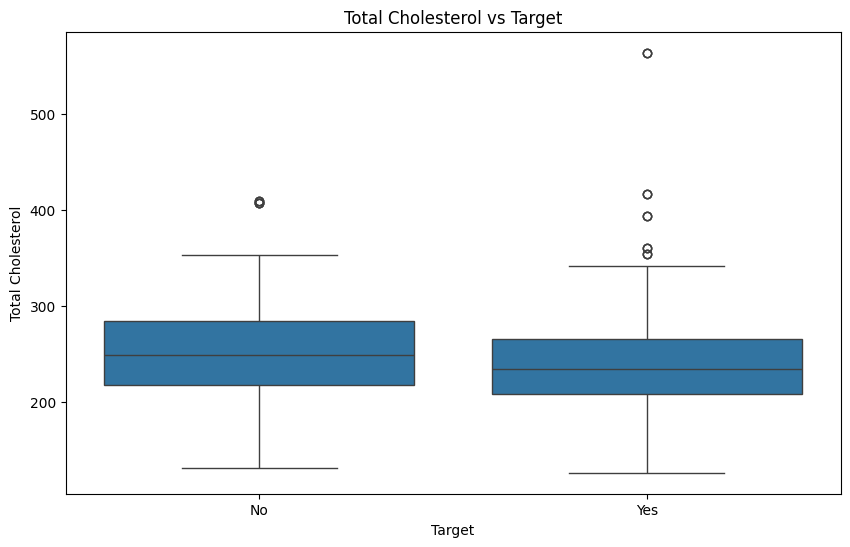

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=dataset)
plt.title('Total Cholesterol vs Target')
plt.xlabel('Target')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

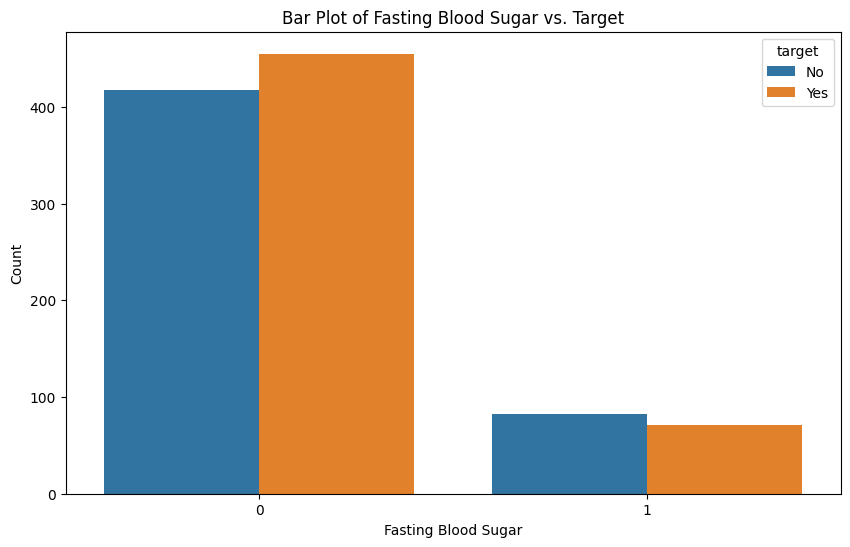

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', hue='target', data=plot_data)
plt.title('Bar Plot of Fasting Blood Sugar vs. Target')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()


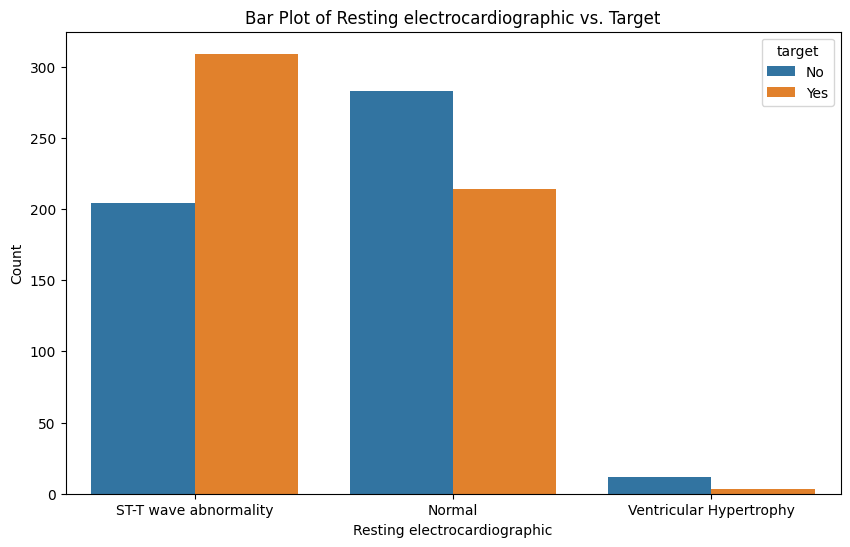

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the DataFrame for plotting
plot_data = dataset.copy()

# Replace values for target and education in the copy
plot_data['target'] = plot_data['target'].replace({0: 'No', 1: 'Yes'})
plot_data['restecg'] = plot_data['restecg'].replace({1: 'ST-T wave abnormality', 0: 'Normal',2:'Ventricular Hypertrophy'})

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='restecg', hue='target', data=plot_data)
plt.title('Bar Plot of Resting electrocardiographic vs. Target')
plt.xlabel('Resting electrocardiographic')
plt.ylabel('Count')
plt.show()


In [ ]:
# Feature Selection

In [15]:
col = dataset.columns[:-1]  # Select all columns except the last one
X = dataset.drop(columns=['target'])  # X contains all columns except 'Outcome'
y = dataset['target']  # y contains the 'Outcome' column, which is the target variable

In [25]:
# Select the top k features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=6)  # Initialize feature selector with ANOVA F-value as the scoring function and select top 6 features
X_new = selector.fit_transform(X, y)  # Fit the selector to the data and transform X to contain only the selected features

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)  # Get the indices of the selected features

# Extract the names of the selected features
selected_feature_names = col[selected_feature_indices]  # Extract the column names of the selected features

# Display the selected feature names
print("Selected Feature Names:")
print(selected_feature_names)

# Data normalization
scaler = StandardScaler()  # Initialize a StandardScaler for feature scaling
X_normalized = scaler.fit_transform(X_new)  # Fit the scaler to the selected features and transform X to contain normalized values
from joblib import dump

# Assuming `scaler` has been fitted on your training data as shown
dump(scaler, 'scaler.joblib')

Selected Feature Names:
Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], dtype='object')


['scaler.joblib']

## Testing for 3 algorithms from Paper

In [17]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [19]:
# KNN (K-Nearest Neighbors):
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier from scikit-learn

knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier with 5 neighbors
knbr = knn.fit(X_train, y_train)  # Train the KNN model with the training data

# Random Forest (RF):
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier from scikit-learn

rf = RandomForestClassifier(n_estimators=100, random_state=0)  # Initialize Random Forest classifier with 100 trees and a random state of 0
randf = rf.fit(X_train, y_train)  # Train the Random Forest model with the training data

# Decision Tree Classifier (DTC):
from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier from scikit-learn

dtc = DecisionTreeClassifier()  # Initialize Decision Tree classifier
dstc = dtc.fit(X_train, y_train)  # Train the Decision Tree model with the training data


from joblib import dump

# Save the KNN model
dump(knbr, 'knn_model.joblib')

# Save the Random Forest model
dump(randf, 'rf_model.joblib')

# Save the Decision Tree model
dump(dstc, 'dtc_model.joblib')

['dtc_model.joblib']

In [20]:
# Evaluate KNN
knn_predictions = knn.predict(X_test)  # Use the trained KNN model to predict labels on the test data
knn_accuracy = accuracy_score(y_test, knn_predictions)  # Calculate accuracy of KNN predictions
knn_precision = precision_score(y_test, knn_predictions, average='weighted')  # Calculate precision of KNN predictions
knn_recall = recall_score(y_test, knn_predictions, average='weighted')  # Calculate recall of KNN predictions
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')  # Calculate F1 score of KNN predictions

# Evaluate Random Forest
rf_predictions = rf.predict(X_test)  # Use the trained Random Forest model to predict labels on the test data
rf_accuracy = accuracy_score(y_test, rf_predictions)  # Calculate accuracy of Random Forest predictions
rf_precision = precision_score(y_test, rf_predictions, average='weighted')  # Calculate precision of Random Forest predictions
rf_recall = recall_score(y_test, rf_predictions, average='weighted')  # Calculate recall of Random Forest predictions
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')  # Calculate F1 score of Random Forest predictions

# Evaluate Decision Tree Classifier
dtc_predictions = dtc.predict(X_test)  # Use the trained Decision Tree Classifier model to predict labels on the test data
dtc_accuracy = accuracy_score(y_test, dtc_predictions)  # Calculate accuracy of Decision Tree Classifier predictions
dtc_precision = precision_score(y_test, dtc_predictions, average='weighted')  # Calculate precision of Decision Tree Classifier predictions
dtc_recall = recall_score(y_test, dtc_predictions, average='weighted')  # Calculate recall of Decision Tree Classifier predictions
dtc_f1 = f1_score(y_test, dtc_predictions, average='weighted')  # Calculate F1 score of Decision Tree Classifier predictions

# Print evaluation metrics for each model
print("KNN - Accuracy:", knn_accuracy, "Precision:", knn_precision, "Recall:", knn_recall, "F1 Score:", knn_f1)
print("Random Forest - Accuracy:", rf_accuracy, "Precision:", rf_precision, "Recall:", rf_recall, "F1 Score:", rf_f1)
print("Decision Tree Classifier - Accuracy:", dtc_accuracy, "Precision:", dtc_precision, "Recall:", dtc_recall, "F1 Score:", dtc_f1)

KNN - Accuracy: 0.8097560975609757 Precision: 0.8132681610216911 Recall: 0.8097560975609757 F1 Score: 0.8091564892631329
Random Forest - Accuracy: 0.9853658536585366 Precision: 0.9857839721254356 Recall: 0.9853658536585366 F1 Score: 0.9853637641109759
Decision Tree Classifier - Accuracy: 0.9853658536585366 Precision: 0.9857839721254356 Recall: 0.9853658536585366 F1 Score: 0.9853637641109759


In [21]:
# Assuming X_train is your tabular data with shape (1600, 8)

# Define a feedforward neural network model_cnn
model_cnn = keras.Sequential([
    keras.layers.Input(shape=(6,)),  # Input shape matches the number of features (8)
    keras.layers.Dense(32, activation='relu'),  # Dense layer with 32 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model_cnn
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric

# Train the model_cnn
model_cnn.fit(X_train, y_train, epochs=20)  # Train the model on the training data for 20 epochs

model_cnn.save('cnn1.h5')

# Evaluate the model_cnn on your test data
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test)  # Evaluate the model on the test data and get test loss and accuracy
print("Test Accuracy:", test_accuracy)  # Print the test accuracy

# Make predictions with the trained model_cnn
cnn_predictions = model_cnn.predict(X_test)

# Set a threshold to convert to 0 or 1
threshold = 0.5
cnn_predictions = (cnn_predictions[:, 0] < threshold).astype(int)

# Calculate additional evaluation metrics for the CNN model
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_precision = precision_score(y_test, cnn_predictions, average='weighted')
cnn_recall = recall_score(y_test, cnn_predictions, average='weighted')
cnn_f1 = f1_score(y_test, cnn_predictions, average='weighted')

# Print the evaluation metrics for the CNN model
print("CNN - Accuracy:", cnn_accuracy, "Precision:", cnn_precision, "Recall:", cnn_recall, "F1 Score:", cnn_f1)

Epoch 1/20
26/26 [==============================] - 2s 6ms/step - loss: 0.6213 - accuracy: 0.6780
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 0.4545 - accuracy: 0.8244
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8390
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8488
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8488
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8537
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8659
Epoch 8/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8768
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8732
Epoch 10/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8793
Epoch 11/20
26/26 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 0s 5ms/step - loss: 0.3964 - accuracy: 0.8244
Test Accuracy: 0.8243902325630188
7/7 [==============================] - 0s 3ms/step
CNN - Accuracy: 0.824390243902439 Precision: 0.8288016967126193 Recall: 0.824390243902439 F1 Score: 0.8237357350637727


In [22]:
# One-hot encode the target variables for neural network training
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Define an LSTM model_lstm
model_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(X_train.shape[1], 1)),  # LSTM layer with 50 units and input shape (X_train.shape[1], 1)
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model_lstm
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Train the model_lstm
model_lstm.fit(X_train, y_train_encoded, epochs=20)  # Train the model on the training data for 20 epochs

model_lstm.save("cnn2.h5")

# Evaluate the model_lstm on your test data
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test_encoded)  # Evaluate the model on the test data and get test loss and accuracy
print("Test Accuracy:", test_accuracy)  # Print the test accuracy

# Make predictions with the trained model_lstm
lstm_predictions = model_lstm.predict(X_test)

# Set a threshold to convert to 0 or 1
threshold = 0.5
lstm_predictions = (lstm_predictions[:, 0] < threshold).astype(int)

# Calculate additional evaluation metrics for the LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions, average='weighted')
lstm_recall = recall_score(y_test, lstm_predictions, average='weighted')
lstm_f1 = f1_score(y_test, lstm_predictions, average='weighted')

# Print the evaluation metrics for the LSTM model
print("LSTM - Accuracy:", lstm_accuracy, "Precision:", lstm_precision, "Recall:", lstm_recall, "F1 Score:", lstm_f1)

Epoch 1/20
26/26 [==============================] - 11s 9ms/step - loss: 0.6733 - accuracy: 0.6768
Epoch 2/20
26/26 [==============================] - 0s 12ms/step - loss: 0.6325 - accuracy: 0.7317
Epoch 3/20
26/26 [==============================] - 0s 14ms/step - loss: 0.5491 - accuracy: 0.7549
Epoch 4/20
26/26 [==============================] - 0s 13ms/step - loss: 0.4977 - accuracy: 0.7780
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.7829
Epoch 6/20
26/26 [==============================] - 0s 12ms/step - loss: 0.4746 - accuracy: 0.7854
Epoch 7/20
26/26 [==============================] - 0s 14ms/step - loss: 0.4749 - accuracy: 0.7841
Epoch 8/20
26/26 [==============================] - 0s 8ms/step - loss: 0.4745 - accuracy: 0.7890
Epoch 9/20
26/26 [==============================] - 0s 11ms/step - loss: 0.4684 - accuracy: 0.8000
Epoch 10/20
26/26 [==============================] - 0s 7ms/step - loss: 0.4737 - accuracy: 0.7854
Epoch 11/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 2s 10ms/step - loss: 0.4823 - accuracy: 0.7805
Test Accuracy: 0.7804877758026123
7/7 [==============================] - 2s 8ms/step
LSTM - Accuracy: 0.7804878048780488 Precision: 0.7849410797478762 Recall: 0.7804878048780488 F1 Score: 0.7795326967111741


In [23]:
# Define a GRU model_gru
model_gru = keras.Sequential([
    keras.layers.GRU(50, input_shape=(X_train.shape[1], 1)),  # GRU layer with 50 units and input shape (X_train.shape[1], 1)
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model_gru
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Train the model_gru
model_gru.fit(X_train, y_train_encoded, epochs=20)  # Train the model on the training data for 20 epochs

model_gru.save("cnn3.h5")

# Evaluate the model_gru on your test data
test_loss, test_accuracy = model_gru.evaluate(X_test, y_test_encoded)  # Evaluate the model on the test data and get test loss and accuracy
print("Test Accuracy:", test_accuracy)  # Print the test accuracy

# Make predictions with the trained model_gru
gru_predictions = model_gru.predict(X_test)

# Set a threshold to convert to 0 or 1
threshold = 0.5
gru_predictions = (gru_predictions[:, 0] < threshold).astype(int)

# Calculate additional evaluation metrics for the GRU model
gru_accuracy = accuracy_score(y_test, gru_predictions)
gru_precision = precision_score(y_test, gru_predictions, average='weighted')
gru_recall = recall_score(y_test, gru_predictions, average='weighted')
gru_f1 = f1_score(y_test, gru_predictions, average='weighted')

# Print the evaluation metrics for the GRU model
print("GRU - Accuracy:", gru_accuracy, "Precision:", gru_precision, "Recall:", gru_recall, "F1 Score:", gru_f1)

Epoch 1/20
26/26 [==============================] - 9s 23ms/step - loss: 0.6623 - accuracy: 0.6780
Epoch 2/20
26/26 [==============================] - 0s 12ms/step - loss: 0.6311 - accuracy: 0.6951
Epoch 3/20
26/26 [==============================] - 0s 16ms/step - loss: 0.5745 - accuracy: 0.7488
Epoch 4/20
26/26 [==============================] - 0s 18ms/step - loss: 0.4968 - accuracy: 0.7659
Epoch 5/20
26/26 [==============================] - 0s 15ms/step - loss: 0.4779 - accuracy: 0.8024
Epoch 6/20
26/26 [==============================] - 0s 17ms/step - loss: 0.4747 - accuracy: 0.7963
Epoch 7/20
26/26 [==============================] - 0s 16ms/step - loss: 0.4688 - accuracy: 0.8024
Epoch 8/20
26/26 [==============================] - 0s 15ms/step - loss: 0.4640 - accuracy: 0.8037
Epoch 9/20
26/26 [==============================] - 0s 14ms/step - loss: 0.4618 - accuracy: 0.8024
Epoch 10/20
26/26 [==============================] - 0s 19ms/step - loss: 0.4568 - accuracy: 0.8134
Epoch 11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 1s 12ms/step - loss: 0.4630 - accuracy: 0.7805
Test Accuracy: 0.7804877758026123
7/7 [==============================] - 1s 6ms/step
GRU - Accuracy: 0.7804878048780488 Precision: 0.7836429723464384 Recall: 0.7804878048780488 F1 Score: 0.7797959491497687


In [26]:
from keras.models import load_model
from joblib import load
import numpy as np
from scipy.stats import mode

def load_models_and_vote(input_features):
    # Load sklearn models
    knn_model = load('knn_model.joblib')
    rf_model = load('rf_model.joblib')
    dtc_model = load('dtc_model.joblib')

    # Load Keras models
    model_cnn = load_model('cnn1.h5')
    model_lstm = load_model('cnn2.h5')
    model_gru = load_model('cnn3.h5')

    # Load scaler
    scaler = load('scaler.joblib')

    # Prepare input
    input_scaled = scaler.transform([input_features])

    # Predict with sklearn models
    knn_predictions = knn_model.predict(input_scaled)
    rf_predictions = rf_model.predict(input_scaled)
    dtc_predictions = dtc_model.predict(input_scaled)

    # Predict with Keras models and convert probabilities to binary predictions
    threshold = 0.5
    cnn_predictions = (model_cnn.predict(input_scaled)[:, 0] < threshold).astype(int)
    lstm_predictions = (model_lstm.predict(np.expand_dims(input_scaled, axis=-1))[:, 0] < threshold).astype(int)
    gru_predictions = (model_gru.predict(np.expand_dims(input_scaled, axis=-1))[:, 0] < threshold).astype(int)

     # Combine all predictions
    combined_predictions, _ = mode([knn_predictions, rf_predictions, dtc_predictions, cnn_predictions, lstm_predictions, gru_predictions])

    print(combined_predictions)


# Example usage
input_features = [53, 1, 1, 206, 92, 215]  # Example input
prediction = load_models_and_vote(input_features)

1/1 [==============================] - 0s 477ms/step


1/1 [==============================] - 0s 412ms/step
[0]


In [ ]:
# Obtain predictions from each algorithm
knn_predictions = knn.predict(X_test)  # Predictions from KNN
rf_predictions = rf.predict(X_test)  # Predictions from Random Forest
dtc_predictions = dtc.predict(X_test)  # Predictions from Decision Tree Classifier
cnn_predictions = (model_cnn.predict(X_test)[:, 0] < 0.5).astype(int)  # Predictions from CNN with thresholding
lstm_predictions = (model_lstm.predict(X_test)[:, 0] < 0.5).astype(int)  # Predictions from LSTM with thresholding
gru_predictions = (model_gru.predict(X_test)[:, 0] < 0.5).astype(int)  # Predictions from GRU with thresholding

# Combine predictions using majority voting
combined_predictions, _ = mode([knn_predictions, rf_predictions, dtc_predictions, cnn_predictions, lstm_predictions, gru_predictions])

# Evaluate the accuracy of majority voting
majority_voting_accuracy = accuracy_score(y_test, combined_predictions)

# Print the accuracy of majority voting
print("Majority Voting Accuracy:", majority_voting_accuracy)

7/7 [==============================] - 0s 5ms/step
Majority Voting Accuracy: 0.8536585365853658


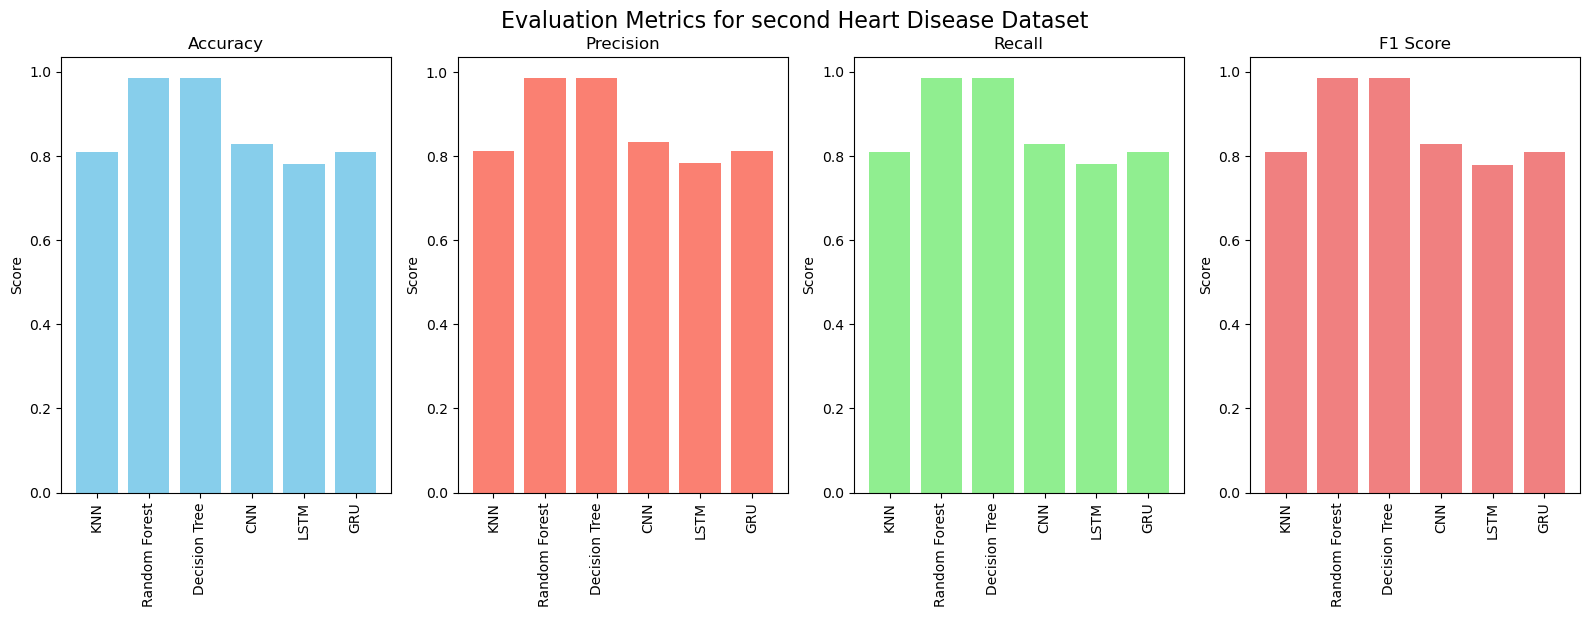

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics for each model
models = ['KNN', 'Random Forest', 'Decision Tree', 'CNN', 'LSTM', 'GRU']
accuracies = [knn_accuracy, rf_accuracy, dtc_accuracy, cnn_accuracy, lstm_accuracy, gru_accuracy]
precisions = [knn_precision, rf_precision, dtc_precision, cnn_precision, lstm_precision, gru_precision]
recalls = [knn_recall, rf_recall, dtc_recall, cnn_recall, lstm_recall, gru_recall]
f1_scores = [knn_f1, rf_f1, dtc_f1, cnn_f1, lstm_f1, gru_f1]

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Accuracy plot
axs[0].bar(models, accuracies, color='skyblue')
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=90)

# Precision plot
axs[1].bar(models, precisions, color='salmon')
axs[1].set_title('Precision')
axs[1].set_ylabel('Score')
axs[1].tick_params(axis='x', rotation=90)

# Recall plot
axs[2].bar(models, recalls, color='lightgreen')
axs[2].set_title('Recall')
axs[2].set_ylabel('Score')
axs[2].tick_params(axis='x', rotation=90)

# F1 Score plot
axs[3].bar(models, f1_scores, color='lightcoral')
axs[3].set_title('F1 Score')
axs[3].set_ylabel('Score')
axs[3].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
fig.suptitle('Evaluation Metrics for second Heart Disease Dataset', fontsize=16, y=1.02)

plt.show()


In [ ]:
# Define a function to calculate maximum input ranges
def calculate_input_ranges(dataset):
    input_ranges = {}
    for column in dataset.columns:
        max_value = dataset[column].max()
        min_value = dataset[column].min()
        input_ranges[column] = (min_value, max_value)
    return input_ranges

# Assuming 'dataset' is your DataFrame containing the data
input_ranges = calculate_input_ranges(dataset)

# Print the maximum input ranges
print("Maximum Input Ranges:")
for column, (min_val, max_val) in input_ranges.items():
    print(f"{column}: {min_val} to {max_val}")


Maximum Input Ranges:
age: 29 to 77
sex: 0 to 1
cp: 0 to 3
trestbps: 94 to 200
chol: 126 to 564
fbs: 0 to 1
restecg: 0 to 2
thalach: 71 to 202
exang: 0 to 1
oldpeak: 0.0 to 6.2
slope: 0 to 2
ca: 0 to 4
thal: 0 to 3
target: 0 to 1


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

def train_random_forest_model(X_train, y_train):
    # Define and train the Random Forest model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    # Save the model to a file
    joblib.dump(model_rf, "random_forest_model.pkl")

def test_random_forest_model(user_inputs):
    # Load the scaler used for normalization during training
    scaler = StandardScaler()
    # Assuming you have already initialized and fitted the scaler during training
    scaler.fit(X_train)

    # Normalize the user inputs using the same scaler used during training
    user_inputs_normalized = scaler.transform(np.array([user_inputs]))

    # Load the saved model
    loaded_model = joblib.load("random_forest_model.pkl")

    # Make predictions using the loaded model
    predictions = loaded_model.predict(user_inputs_normalized)
    if predictions== [0]:
        prediction_label = "No"
    else:
        prediction_label = "Yes"

    print("Prediction Label:", prediction_label)

# Example usage:

# Train the Random Forest model
train_random_forest_model(X_train, y_train)

# Test the Random Forest model with user inputs
user_inputs = [10, 150, 1, 2, 2, 0]  # Example user inputs
test_random_forest_model(user_inputs)


Prediction Label: No


In [ ]:
# Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], dtype='object')